# More Human Failure Analyses

In [1]:
from fmdtools.sim.sample import ParameterDomain, ParameterSample, FaultDomain, FaultSample
import fmdtools.analyze as an
import fmdtools.sim.propagate as prop
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import multiprocessing as mp
import scipy.stats as stats


import multiprocessing as mp

In [2]:
from examples.rover.rover_model_human import RoverHuman, RoverHumanParam, asg_pos
from examples.rover.rover_model import plot_map

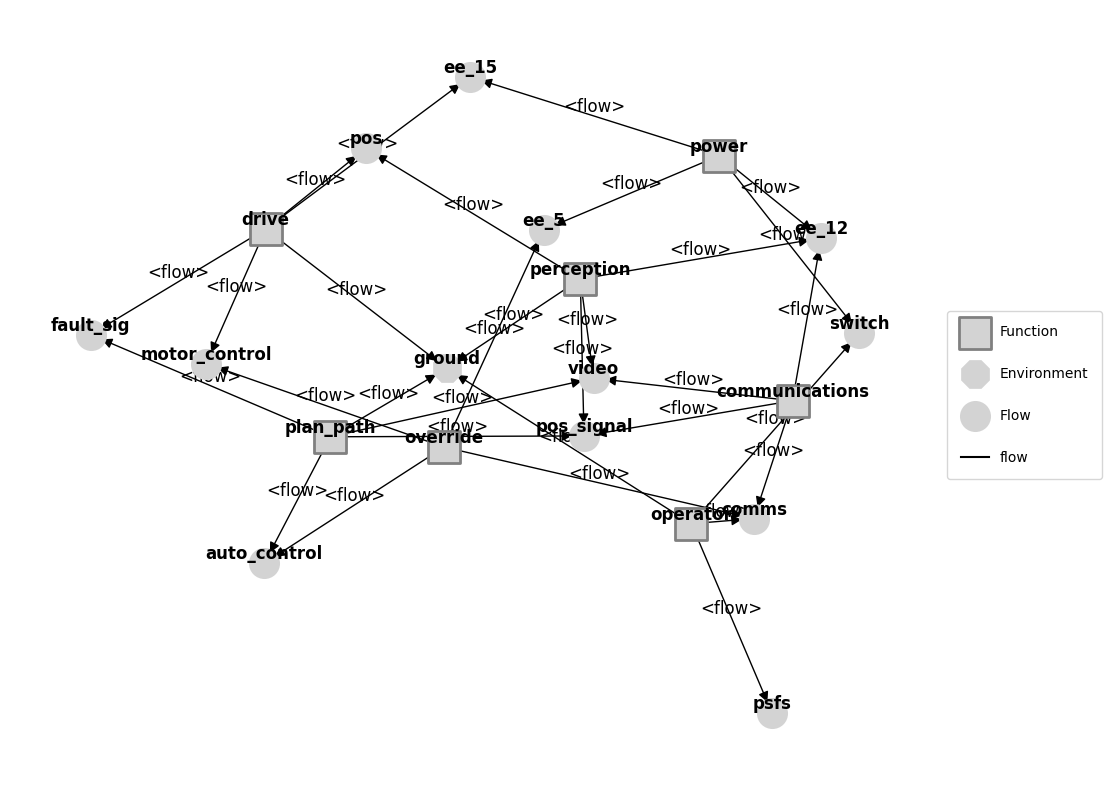

In [3]:
mdl = RoverHuman()
g = an.graph.architecture.FunctionArchitectureGraph(mdl)
fig, ax = g.draw()

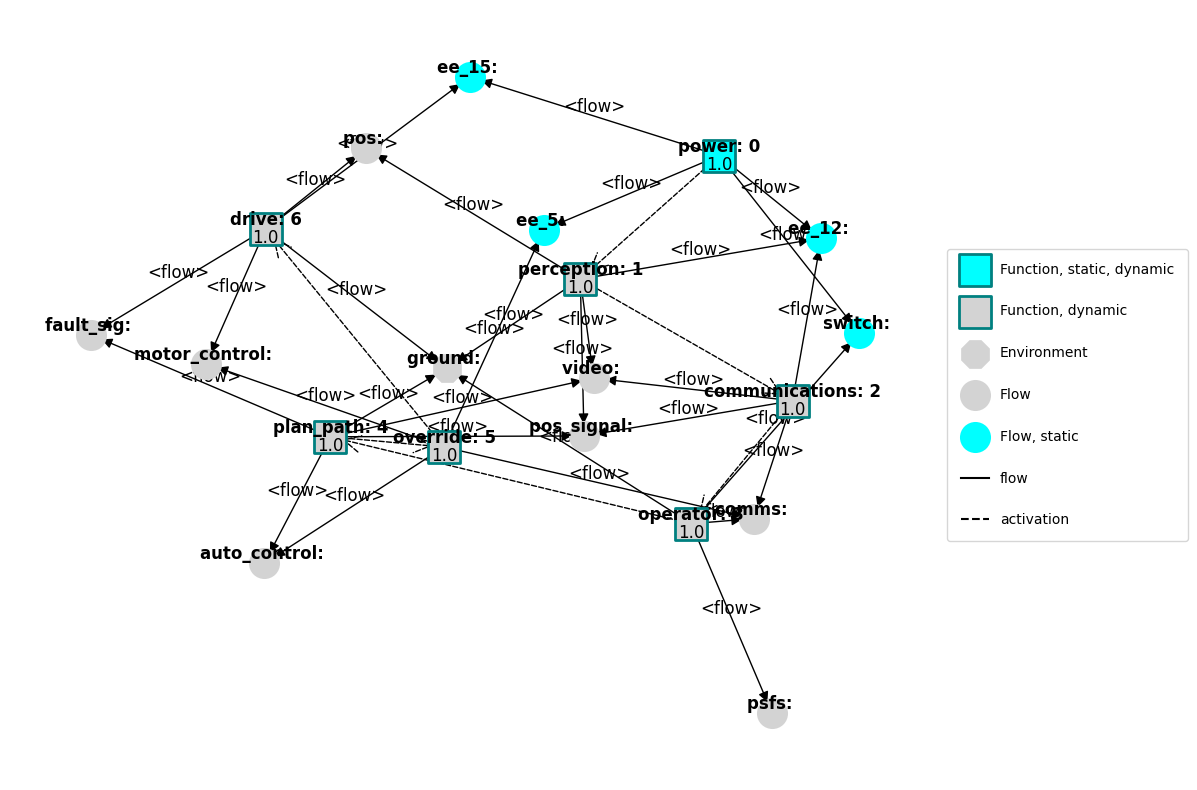

In [4]:
g.set_exec_order(mdl)
fig, ax = g.draw()

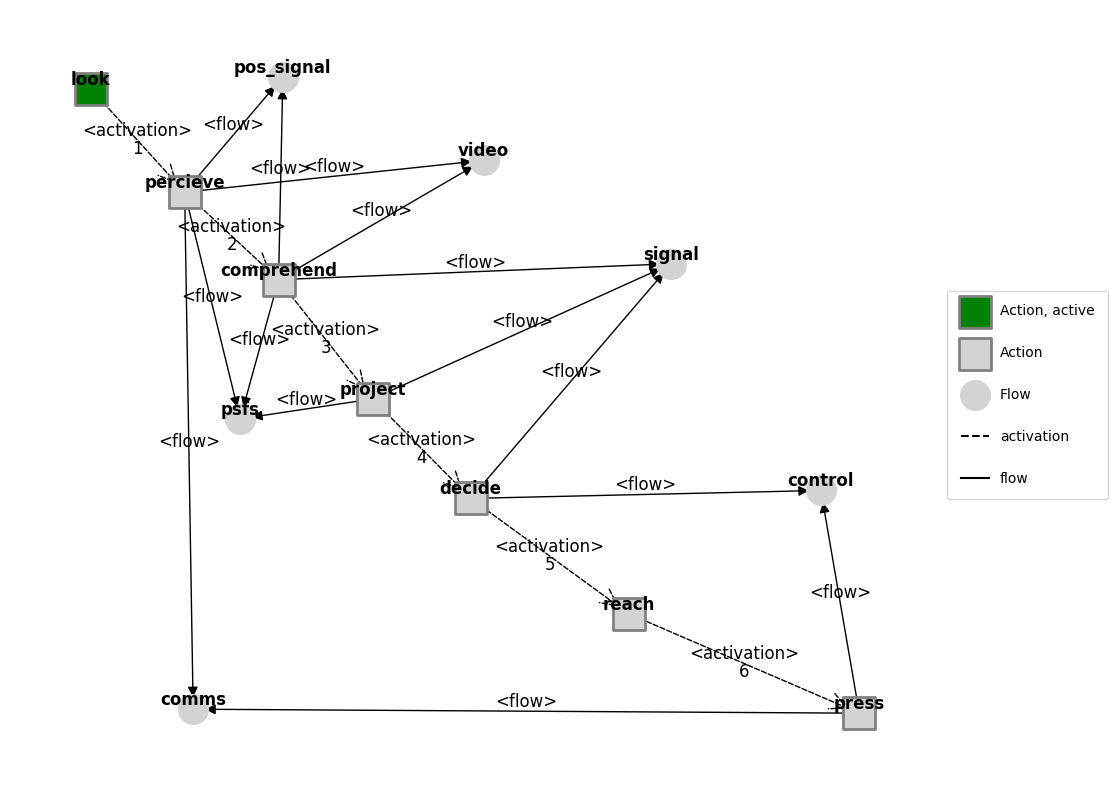

In [5]:
ag = an.graph.architecture.ActionArchitectureGraph(mdl.fxns['operator'].aa)
ag.set_pos(**asg_pos)
fig, ax = ag.draw()

In [6]:
fig.savefig("action_graph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

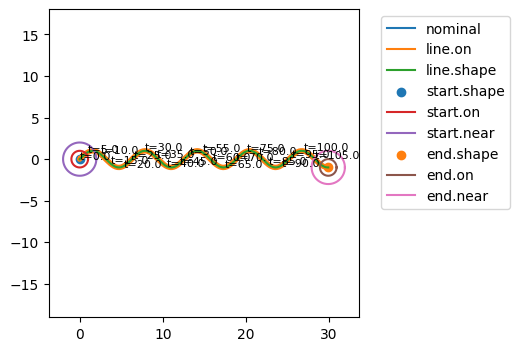

In [7]:
mdl = RoverHuman(p={'linetype': 'sine', 'period': 10, 'amp': 3, 'drive_modes': {'mode_args':'manual'}})
er, hist = prop.nominal(mdl)
fig, ax = plot_map(mdl, hist)

In [8]:
mdl.fxns['drive'].m.faultmodes

{'elec_open': Fault(prob=0.25, cost=0.0, phases={'drive': 1.0, 'start': 1.0}, units='sim'),
 'stuck': Fault(prob=0.25, cost=0.0, phases={'drive': 1.0, 'start': 1.0}, units='sim'),
 'stuck_right': Fault(prob=0.25, cost=0.0, phases={'drive': 1.0, 'start': 1.0}, units='sim'),
 'stuck_left': Fault(prob=0.25, cost=0.0, phases={'drive': 1.0, 'start': 1.0}, units='sim')}

In [9]:
fd_hum = FaultDomain(mdl)
fd_hum.add_all_fxn_modes('operator')
fd_hum

FaultDomain with faults:
 -('operator', 'look_failed_no_action')
 -('operator', 'percieve_failed_no_action')
 -('operator', 'percieve_not_visible')
 -('operator', 'percieve_wrong_position')
 -('operator', 'comprehend_failed_no_action')
 -('operator', 'project_failed_turn_left')
 -('operator', 'project_failed_turn_right')
 -('operator', 'project_failed_slow')
 -('operator', 'project_failed_fast')
 -('operator', 'project_failed_no_action')
 -...more

In [10]:
fs_hum = FaultSample(fd_hum)
fs_hum.add_fault_phases("start")
fs_hum

FaultSample of scenarios: 
 - operator_look_failed_no_action_t15p0
 - operator_percieve_failed_no_action_t15p0
 - operator_percieve_not_visible_t15p0
 - operator_percieve_wrong_position_t15p0
 - operator_comprehend_failed_no_action_t15p0
 - operator_project_failed_turn_left_t15p0
 - operator_project_failed_turn_right_t15p0
 - operator_project_failed_slow_t15p0
 - operator_project_failed_fast_t15p0
 - operator_project_failed_no_action_t15p0
 - ... (19 total)

In [11]:
fs_hum.scenarios()

[SingleFaultScenario(sequence={15.0: Injection(faults={'operator': ['look_failed_no_action']}, disturbances={})}, times=(15.0,), function='operator', fault='look_failed_no_action', rate=1.0, name='operator_look_failed_no_action_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'operator': ['percieve_failed_no_action']}, disturbances={})}, times=(15.0,), function='operator', fault='percieve_failed_no_action', rate=0.3333333333333333, name='operator_percieve_failed_no_action_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'operator': ['percieve_not_visible']}, disturbances={})}, times=(15.0,), function='operator', fault='percieve_not_visible', rate=0.3333333333333333, name='operator_percieve_not_visible_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'operator': ['percieve_wrong_position']}, disturbances={})}, times=(15.0,), function='operator', fault='percieve_wron

In [12]:
ecs, hists = prop.fault_sample(mdl, fs_hum)

SCENARIOS COMPLETE:   0%|          | 0/19 [00:00<?, ?it/s]

SCENARIOS COMPLETE:  11%|█         | 2/19 [00:00<00:02,  7.68it/s]

SCENARIOS COMPLETE:  16%|█▌        | 3/19 [00:00<00:02,  6.31it/s]

SCENARIOS COMPLETE:  21%|██        | 4/19 [00:00<00:02,  5.72it/s]

SCENARIOS COMPLETE:  37%|███▋      | 7/19 [00:00<00:01, 10.38it/s]

SCENARIOS COMPLETE:  47%|████▋     | 9/19 [00:01<00:01,  8.46it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 11/19 [00:01<00:00, 10.57it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 13/19 [00:01<00:00, 12.46it/s]

SCENARIOS COMPLETE:  79%|███████▉  | 15/19 [00:01<00:00, 14.14it/s]

SCENARIOS COMPLETE:  89%|████████▉ | 17/19 [00:01<00:00, 11.43it/s]

SCENARIOS COMPLETE: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]

SCENARIOS COMPLETE: 100%|██████████| 19/19 [00:02<00:00,  9.20it/s]

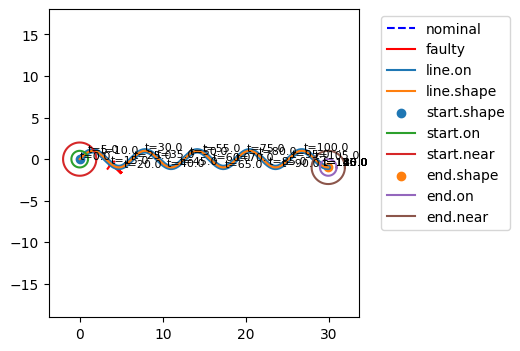

In [13]:
fig, ax = plot_map(mdl, hists)

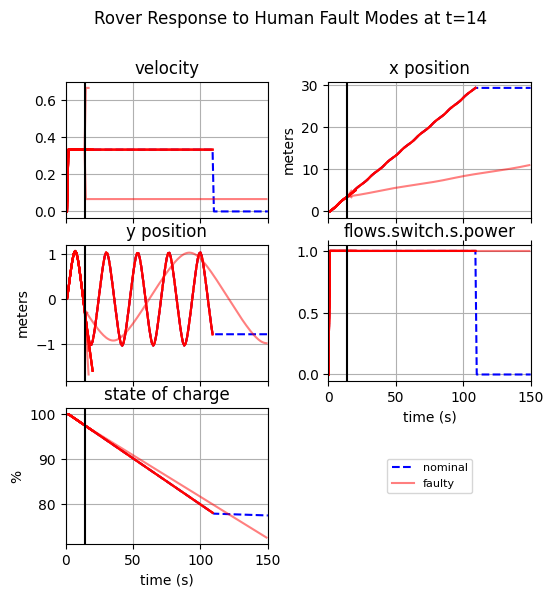

In [14]:
figs, axs = hists.plot_line('flows.pos.s.vel','flows.pos.s.x', 'flows.pos.s.y',
                            'flows.switch.s.power', 'fxns.power.s.charge', time_slice=[14],
                            title="Rover Response to Human Fault Modes at t=14",
                            indiv_kwargs={'faulty':{'alpha':0.5, 'color':'red'}},
                            ylabels={'flows.pos.s.x':'meters','flows.pos.s.y':'meters', 'flows.ground.s.x':'m/s',
                                   'fxns.power.s.charge': '%'}, xlabel='time (s)',
                            titles={'flows.pos.s.x':'x position','flows.pos.s.y':'y position', 'flows.pos.s.vel':'velocity',
                                   'flows.s.switch': 'on/off switch', 'fxns.power.s.charge': 'state of charge'}, h_padding=0.3)

In [15]:
fig.savefig("rover_fault_behavior.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [16]:
from examples.rover.rover_degradation import PSFDegradationShort, PSFShortParams

In [17]:
pd_deg = ParameterDomain(PSFShortParams)
pd_deg.add_constant('stress_param', 0.0)
pd_deg.add_variable('experience', var_lim=(1.0, 5.0))
pd_deg(2,2)

PSFShortParams(experience=2.0, stress_param=0.0, fatigue_param=1.0)

In [18]:
ps_deg = ParameterSample(pd_deg)
ps_deg.add_variable_ranges(replicates = 10)
ps_deg.scenarios()

[ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0.0}, r={'seed': 2853988080}, sp={}, prob=0.02, inputparams={0: 1.0}, rangeid='', name='rep0_range_0'),
 ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0.0}, r={'seed': 4183548858}, sp={}, prob=0.02, inputparams={0: 1.0}, rangeid='', name='rep1_range_1'),
 ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0.0}, r={'seed': 468779001}, sp={}, prob=0.02, inputparams={0: 1.0}, rangeid='', name='rep2_range_2'),
 ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0.0}, r={'seed': 3597705170}, sp={}, prob=0.02, inputparams={0: 1.0}, rangeid='', name='rep3_range_3'),
 ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0.0}, r={'seed': 2876102513}, sp={}, prob=0.02, inputparams={0: 1.0}, rangeid='', name='rep4_range_4'),
 ParameterScenario(sequence={}, times=(), p={'experience': 1.0, 'stress_param': 0

In [19]:
deg_mdl = PSFDegradationShort()
ec_psf_short, hist_psf_short = prop.parameter_sample(deg_mdl, ps_deg, run_stochastic=True)

SCENARIOS COMPLETE:   0%|          | 0/50 [00:00<?, ?it/s]

SCENARIOS COMPLETE: 100%|██████████| 50/50 [00:00<00:00, 515.31it/s]

In [20]:
hist_psf_short.keys()

dict_keys(['rep0_range_0.s.fatigue', 'rep0_range_0.s.stress', 'rep0_range_0.s.experience', 'rep0_range_0.r.s.fatigue_param', 'rep0_range_0.r.probdens', 'rep0_range_0.time', 'rep1_range_1.s.fatigue', 'rep1_range_1.s.stress', 'rep1_range_1.s.experience', 'rep1_range_1.r.s.fatigue_param', 'rep1_range_1.r.probdens', 'rep1_range_1.time', 'rep2_range_2.s.fatigue', 'rep2_range_2.s.stress', 'rep2_range_2.s.experience', 'rep2_range_2.r.s.fatigue_param', 'rep2_range_2.r.probdens', 'rep2_range_2.time', 'rep3_range_3.s.fatigue', 'rep3_range_3.s.stress', 'rep3_range_3.s.experience', 'rep3_range_3.r.s.fatigue_param', 'rep3_range_3.r.probdens', 'rep3_range_3.time', 'rep4_range_4.s.fatigue', 'rep4_range_4.s.stress', 'rep4_range_4.s.experience', 'rep4_range_4.r.s.fatigue_param', 'rep4_range_4.r.probdens', 'rep4_range_4.time', 'rep5_range_5.s.fatigue', 'rep5_range_5.s.stress', 'rep5_range_5.s.experience', 'rep5_range_5.r.s.fatigue_param', 'rep5_range_5.r.probdens', 'rep5_range_5.time', 'rep6_range_6.s.f

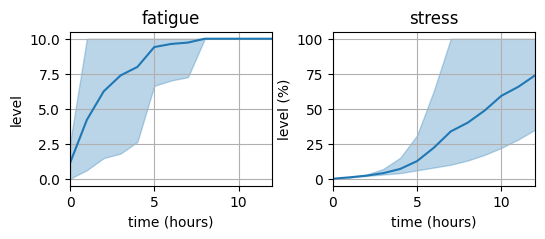

In [21]:
fig, axs = hist_psf_short.plot_line('s.fatigue', 's.stress', aggregation='mean_bound', xlabel="time (hours)",
                           ylabels={'s.fatigue': 'level','s.stress': 'level (%)'}, h_padding=0.3,
                           titles={'s.fatigue': 'fatigue', 's.stress': 'stress'})

In [22]:
fig.savefig("degraded_PSFs.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [23]:
RoverHumanParam().psfs

PSFParam(fatigue=0.0, stress=0.0)

In [24]:
from fmdtools.sim.sample import ParameterHistSample
pd_psf = ParameterDomain(RoverHumanParam)
pd_psf.add_variables('psfs.fatigue', 'psfs.stress')
phs = ParameterHistSample(hist_psf_short, 's.fatigue', 's.stress', paramdomain=pd_psf)
# phs.add_hist_times('default', 1, ts=(0, 10, 1))
phs.add_hist_groups(ts=(0, 10, 1), reps=5)
# phs.add_hist_scenario(rep=4, t=1)
len(phs.scenarios())

50

In [25]:
ec_hum, hist_hum = prop.parameter_sample(mdl, phs)

SCENARIOS COMPLETE:   0%|          | 0/50 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   2%|▏         | 1/50 [00:00<00:12,  3.94it/s]

SCENARIOS COMPLETE:   4%|▍         | 2/50 [00:00<00:12,  3.96it/s]

SCENARIOS COMPLETE:   6%|▌         | 3/50 [00:00<00:11,  3.95it/s]

SCENARIOS COMPLETE:   8%|▊         | 4/50 [00:01<00:11,  4.00it/s]

SCENARIOS COMPLETE:  10%|█         | 5/50 [00:01<00:11,  4.06it/s]

SCENARIOS COMPLETE:  12%|█▏        | 6/50 [00:01<00:11,  3.83it/s]

SCENARIOS COMPLETE:  14%|█▍        | 7/50 [00:01<00:10,  3.95it/s]

SCENARIOS COMPLETE:  16%|█▌        | 8/50 [00:02<00:10,  4.02it/s]

SCENARIOS COMPLETE:  18%|█▊        | 9/50 [00:02<00:10,  4.06it/s]

SCENARIOS COMPLETE:  20%|██        | 10/50 [00:02<00:09,  4.10it/s]

SCENARIOS COMPLETE:  22%|██▏       | 11/50 [00:02<00:09,  4.10it/s]

SCENARIOS COMPLETE:  24%|██▍       | 12/50 [00:02<00:09,  4.11it/s]

SCENARIOS COMPLETE:  26%|██▌       | 13/50 [00:03<00:08,  4.13it/s]

SCENARIOS COMPLETE:  28%|██▊       | 14/50 [00:03<00:08,  4.14it/s]

SCENARIOS COMPLETE:  30%|███       | 15/50 [00:03<00:08,  4.17it/s]

SCENARIOS COMPLETE:  32%|███▏      | 16/50 [00:03<00:08,  4.15it/s]

SCENARIOS COMPLETE:  34%|███▍      | 17/50 [00:04<00:07,  4.15it/s]

SCENARIOS COMPLETE:  36%|███▌      | 18/50 [00:04<00:07,  4.14it/s]

SCENARIOS COMPLETE:  38%|███▊      | 19/50 [00:04<00:07,  4.14it/s]

SCENARIOS COMPLETE:  40%|████      | 20/50 [00:04<00:07,  4.15it/s]

SCENARIOS COMPLETE:  42%|████▏     | 21/50 [00:05<00:07,  4.12it/s]

SCENARIOS COMPLETE:  44%|████▍     | 22/50 [00:05<00:06,  4.12it/s]

SCENARIOS COMPLETE:  46%|████▌     | 23/50 [00:05<00:06,  4.12it/s]

SCENARIOS COMPLETE:  48%|████▊     | 24/50 [00:05<00:06,  4.14it/s]

SCENARIOS COMPLETE:  50%|█████     | 25/50 [00:06<00:05,  4.18it/s]

SCENARIOS COMPLETE:  52%|█████▏    | 26/50 [00:06<00:05,  4.19it/s]

SCENARIOS COMPLETE:  54%|█████▍    | 27/50 [00:06<00:05,  4.18it/s]

SCENARIOS COMPLETE:  56%|█████▌    | 28/50 [00:06<00:05,  4.15it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 29/50 [00:07<00:05,  4.14it/s]

SCENARIOS COMPLETE:  60%|██████    | 30/50 [00:07<00:04,  4.14it/s]

SCENARIOS COMPLETE:  62%|██████▏   | 31/50 [00:07<00:04,  4.12it/s]

SCENARIOS COMPLETE:  64%|██████▍   | 32/50 [00:07<00:04,  4.10it/s]

SCENARIOS COMPLETE:  66%|██████▌   | 33/50 [00:08<00:04,  4.09it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 34/50 [00:08<00:03,  4.09it/s]

SCENARIOS COMPLETE:  70%|███████   | 35/50 [00:08<00:03,  4.09it/s]

SCENARIOS COMPLETE:  72%|███████▏  | 36/50 [00:08<00:03,  4.10it/s]

SCENARIOS COMPLETE:  74%|███████▍  | 37/50 [00:09<00:03,  4.09it/s]

SCENARIOS COMPLETE:  76%|███████▌  | 38/50 [00:09<00:02,  4.10it/s]

SCENARIOS COMPLETE:  78%|███████▊  | 39/50 [00:09<00:02,  4.10it/s]

SCENARIOS COMPLETE:  80%|████████  | 40/50 [00:09<00:02,  4.13it/s]

SCENARIOS COMPLETE:  82%|████████▏ | 41/50 [00:10<00:02,  4.09it/s]

SCENARIOS COMPLETE:  84%|████████▍ | 42/50 [00:10<00:01,  4.09it/s]

SCENARIOS COMPLETE:  86%|████████▌ | 43/50 [00:10<00:01,  4.12it/s]

SCENARIOS COMPLETE:  88%|████████▊ | 44/50 [00:10<00:01,  4.11it/s]

SCENARIOS COMPLETE:  90%|█████████ | 45/50 [00:10<00:01,  4.12it/s]

SCENARIOS COMPLETE:  92%|█████████▏| 46/50 [00:11<00:00,  4.10it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 47/50 [00:11<00:00,  4.08it/s]

SCENARIOS COMPLETE:  96%|█████████▌| 48/50 [00:11<00:00,  4.09it/s]

SCENARIOS COMPLETE:  98%|█████████▊| 49/50 [00:11<00:00,  4.09it/s]

SCENARIOS COMPLETE: 100%|██████████| 50/50 [00:12<00:00,  4.16it/s]

SCENARIOS COMPLETE: 100%|██████████| 50/50 [00:12<00:00,  4.10it/s]

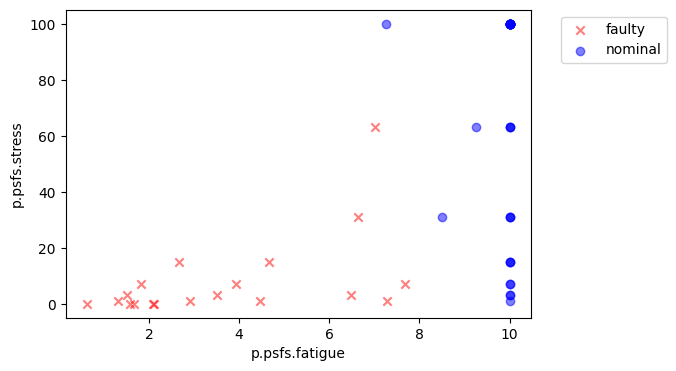

In [26]:
from fmdtools.analyze.tabulate import NominalEnvelope
na = NominalEnvelope(phs, ec_hum, 'at_finish', 'p.psfs.fatigue', 'p.psfs.stress')
fig, ax = na.as_plot()

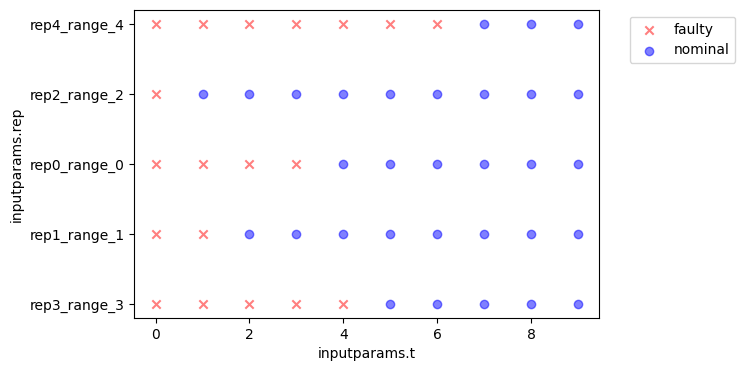

In [27]:
na = NominalEnvelope(phs, ec_hum, 'at_finish', 'inputparams.t', 'inputparams.rep')
fig, ax = na.as_plot()

In [28]:
fig.savefig("nominal_PSF_completions.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [29]:
from fmdtools.sim.sample import SampleApproach
sa = SampleApproach(mdl)
sa.add_faultdomains(**{'drive': (('all_fxn_modes', 'drive'), {})})
sa.add_faultsamples(**{'drive': (('fault_phases', 'drive', 'start'), {})})
sa.scenarios()

[SingleFaultScenario(sequence={15.0: Injection(faults={'drive': ['elec_open']}, disturbances={})}, times=(15.0,), function='drive', fault='elec_open', rate=0.25, name='drive_elec_open_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'drive': ['stuck']}, disturbances={})}, times=(15.0,), function='drive', fault='stuck', rate=0.25, name='drive_stuck_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'drive': ['stuck_right']}, disturbances={})}, times=(15.0,), function='drive', fault='stuck_right', rate=0.25, name='drive_stuck_right_t15p0', time=15.0, phase='start'),
 SingleFaultScenario(sequence={15.0: Injection(faults={'drive': ['stuck_left']}, disturbances={})}, times=(15.0,), function='drive', fault='stuck_left', rate=0.25, name='drive_stuck_left_t15p0', time=15.0, phase='start')]

In [30]:
f_ecs, f_hists, apps = prop.nested_sample(mdl, phs,
                                          faultdomains={'drive': (('all_fxn_modes', 'drive'), {})},
                                          faultsamples={'drive': (('fault_phases', 'drive', 'start'), {})})

NESTED SCENARIOS COMPLETE:   0%|          | 0/50 [00:00<?, ?it/s]

NESTED SCENARIOS COMPLETE:   2%|▏         | 1/50 [00:01<00:54,  1.11s/it]

NESTED SCENARIOS COMPLETE:   4%|▍         | 2/50 [00:02<00:53,  1.10s/it]

NESTED SCENARIOS COMPLETE:   6%|▌         | 3/50 [00:03<00:52,  1.11s/it]

NESTED SCENARIOS COMPLETE:   8%|▊         | 4/50 [00:04<00:52,  1.14s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  10%|█         | 5/50 [00:05<00:56,  1.25s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  12%|█▏        | 6/50 [00:07<00:58,  1.33s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  14%|█▍        | 7/50 [00:08<00:59,  1.38s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  16%|█▌        | 8/50 [00:10<00:59,  1.41s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  18%|█▊        | 9/50 [00:11<00:58,  1.43s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  20%|██        | 10/50 [00:13<00:57,  1.44s/it]

NESTED SCENARIOS COMPLETE:  22%|██▏       | 11/50 [00:14<00:52,  1.34s/it]

NESTED SCENARIOS COMPLETE:  24%|██▍       | 12/50 [00:15<00:48,  1.27s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  26%|██▌       | 13/50 [00:17<00:49,  1.32s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  28%|██▊       | 14/50 [00:18<00:49,  1.37s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  30%|███       | 15/50 [00:19<00:49,  1.40s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  32%|███▏      | 16/50 [00:21<00:48,  1.42s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  34%|███▍      | 17/50 [00:22<00:47,  1.44s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  36%|███▌      | 18/50 [00:24<00:46,  1.45s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  38%|███▊      | 19/50 [00:25<00:44,  1.45s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  40%|████      | 20/50 [00:27<00:43,  1.46s/it]

NESTED SCENARIOS COMPLETE:  42%|████▏     | 21/50 [00:28<00:39,  1.35s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  44%|████▍     | 22/50 [00:29<00:38,  1.38s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  46%|████▌     | 23/50 [00:31<00:38,  1.41s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  48%|████▊     | 24/50 [00:32<00:37,  1.43s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  50%|█████     | 25/50 [00:34<00:36,  1.46s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  52%|█████▏    | 26/50 [00:35<00:35,  1.47s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  54%|█████▍    | 27/50 [00:37<00:33,  1.47s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  56%|█████▌    | 28/50 [00:38<00:32,  1.46s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  58%|█████▊    | 29/50 [00:40<00:30,  1.47s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  60%|██████    | 30/50 [00:41<00:29,  1.47s/it]

NESTED SCENARIOS COMPLETE:  62%|██████▏   | 31/50 [00:42<00:25,  1.36s/it]

NESTED SCENARIOS COMPLETE:  64%|██████▍   | 32/50 [00:43<00:23,  1.29s/it]

NESTED SCENARIOS COMPLETE:  66%|██████▌   | 33/50 [00:45<00:20,  1.23s/it]

NESTED SCENARIOS COMPLETE:  68%|██████▊   | 34/50 [00:46<00:19,  1.20s/it]

NESTED SCENARIOS COMPLETE:  70%|███████   | 35/50 [00:47<00:17,  1.17s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  72%|███████▏  | 36/50 [00:48<00:17,  1.26s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  74%|███████▍  | 37/50 [00:50<00:17,  1.32s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  76%|███████▌  | 38/50 [00:51<00:16,  1.37s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  78%|███████▊  | 39/50 [00:53<00:15,  1.40s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  80%|████████  | 40/50 [00:54<00:14,  1.42s/it]

NESTED SCENARIOS COMPLETE:  82%|████████▏ | 41/50 [00:55<00:11,  1.32s/it]

NESTED SCENARIOS COMPLETE:  84%|████████▍ | 42/50 [00:56<00:10,  1.26s/it]

NESTED SCENARIOS COMPLETE:  86%|████████▌ | 43/50 [00:57<00:08,  1.21s/it]

NESTED SCENARIOS COMPLETE:  88%|████████▊ | 44/50 [00:58<00:07,  1.18s/it]

NESTED SCENARIOS COMPLETE:  90%|█████████ | 45/50 [01:00<00:05,  1.16s/it]

NESTED SCENARIOS COMPLETE:  92%|█████████▏| 46/50 [01:01<00:04,  1.14s/it]

NESTED SCENARIOS COMPLETE:  94%|█████████▍| 47/50 [01:02<00:03,  1.12s/it]

Faults found during the nominal run {'operator': ['comprehend_failed_no_action']}


NESTED SCENARIOS COMPLETE:  96%|█████████▌| 48/50 [01:03<00:02,  1.23s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE:  98%|█████████▊| 49/50 [01:05<00:01,  1.30s/it]

Faults found during the nominal run {'operator': ['percieve_failed_no_action']}


NESTED SCENARIOS COMPLETE: 100%|██████████| 50/50 [01:06<00:00,  1.37s/it]

NESTED SCENARIOS COMPLETE: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]

In [31]:
from fmdtools.analyze.tabulate import NestedComparison
nc = NestedComparison(f_ecs, phs, samp_factors=['inputparams.t'], samps=apps, samps_factors=['fault'], metrics=['end_dist', 'tot_deviation'])
nc.sort_by_factor('fault')
nc.sort_by_factor('inputparams.t')
nc.as_table()

,,end_dist,tot_deviation
0,stuck_left,30.044497,0.388610
1,stuck_left,31.264909,0.310888
0,stuck_right,30.519136,0.270632
3,stuck_left,32.485320,0.233166
2,stuck_left,32.485320,0.233166
1,stuck_right,31.644620,0.216505
2,stuck_right,32.770104,0.162379
3,stuck_right,32.770104,0.162379
4,stuck_left,33.705732,0.155444
0,elec_open,31.752378,0.148246


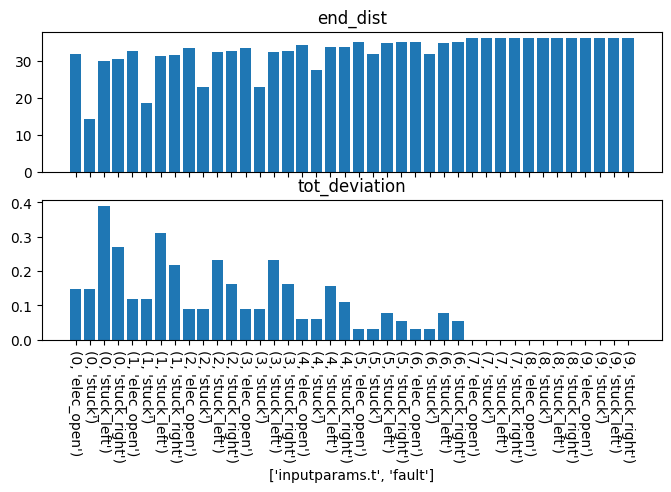

In [32]:
fig, axs = nc.as_plots('end_dist', 'tot_deviation', figsize = (8, 4))